In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import diffprivlib
import math

# Diffprivlib

Diffprivlib is a general-purpose library for experimenting with, investigating and developing applications in, differential privacy

Diffprivlib is comprised of four major components:

- **Mechanisms:** These are the building blocks of differential privacy, and are used in all models that implement differential privacy. Mechanisms have little or no default settings, and are intended for use by experts implementing their own models. They can, however, be used outside models for separate investigations, etc.
- **Models:** This module includes machine learning models with differential privacy. Diffprivlib currently has models for clustering, classification, regression, dimensionality reduction and pre-processing.
- **Tools:** Diffprivlib comes with a number of generic tools for differentially private data analysis. This includes differentially private histograms, following the same format as Numpy's histogram function.
- **Accountant:** The BudgetAccountant class can be used to track privacy budget and calculate total privacy loss using advanced composition techniques.

Diffpriblib has simar api like sklearn and numpy so its realy easy to use.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris(as_frame=True)['frame']
target= "target"
features = dataset.columns.difference([target])

# split the dataset in training and test set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[[target]], test_size=0.2)

# A. Data analysis

# A1. Histogram
use Diffprivlib histogram to vizualise your data

In [4]:
from diffprivlib.tools import histogram

espilon = 0.1 
counts, bins = diffprivlib.tools.histogram(X_train[features[0]], epsilon=1.0, bins=20)
counts_true, bins_true = diffprivlib.tools.histogram(X_train[features[0]], epsilon=float("inf"), bins=20)

/Users/andreasathanasopoulos/Phd/projects/env/ml-society/lib/python3.9/site-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"
/Users/andreasathanasopoulos/Phd/projects/env/ml-society/lib/python3.9/site-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


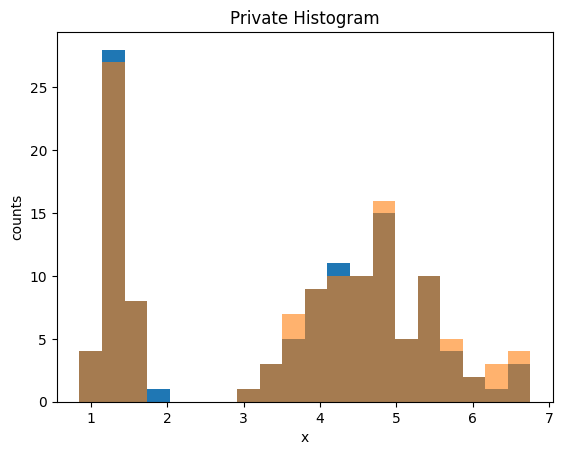

In [5]:
plt.figure()

plt.bar(height = counts_true,
        x = bins_true[:-1],
        width=(bins_true[1]-bins_true[0]),
        alpha = 1.0)

plt.bar(height = counts,
        x = bins[:-1],
        width=(bins[1]-bins[0]),
        alpha = 0.6)

plt.title("Private Histogram")
plt.xlabel("x")
plt.ylabel("counts")
plt.show()
plt.close()

# B. train different model

we will try to train Naive Bayes classifier using sklearn and Diffprivlib to see the diferent

### B1. train Naive Bayes classifier using sklearn
Train Naive Bayes classifier using sklearn in order to have a ground thruth.

In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train[target])
sklearn_error = model.score(X_test,y_test[target])
print(sklearn_error)

0.9666666666666667


In [17]:
from diffprivlib.models import GaussianNB as private_GaussianNB

private_model = private_GaussianNB(epsilon=float("inf"))
private_model.fit(X_train, y_train[target])

tmp_error = private_model.score(X_test,y_test[target])
print(tmp_error)

0.9666666666666667


/Users/andreasathanasopoulos/Phd/projects/env/ml-society/lib/python3.9/site-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


### B2. train Naive Bayes classifier using Diffprivlib
Train Naive Bayes classifier using Diffprivlib for different espilon and compare them to the sklearn clasifier

In [18]:
epsilons = np.logspace(-2, 2, 20)

In [19]:
bounds = (np.min(X_test, axis=0), np.max(X_test, axis=0))

In [20]:
from diffprivlib.models import GaussianNB as private_GaussianNB

errors, std_errors = [], []
for epsilon in epsilons:
    e_error = []
    for _ in range(20):
        private_model = private_GaussianNB(epsilon=epsilon,bounds=bounds)
        private_model.fit(X_train, y_train[target])
    
        tmp_error = private_model.score(X_test,y_test[target])
        e_error.append(tmp_error)
    errors.append(np.mean(e_error))
    std_errors.append(np.std(e_error))

Text(0, 0.5, 'accuracy')

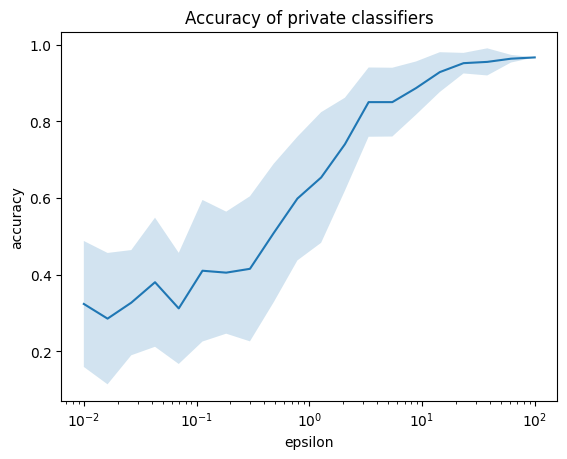

In [21]:
plt.semilogx(epsilons, errors)
plt.fill_between(epsilons, 
                 np.array(errors) - np.array(std_errors),
                 np.array(errors) + np.array(std_errors),
                 alpha=0.2)
plt.title("Accuracy of private classifiers")
plt.xlabel("epsilon")
plt.ylabel("accuracy")

### B3. try very large epsilon
try epsilon of float("inf") to check the behevior of the model

In [182]:
epsilon = float("inf")

In [183]:
private_model = private_GaussianNB(epsilon=epsilon, bounds=bounds)
private_model.fit(X_train, y_train[target])

tmp_error = private_model.score(X_test,y_test[target])
print(tmp_error)

0.9


In [184]:
print(sklearn_error)

0.9
